# Tensorflow Linear 


# Dimensionality and Broadcasting

When we operate on arrays of different dimensionality, they can combine in different ways, either elementwise or through broadcasting.

Let’s start from scratch and build up to more complex examples. 

In [1]:
import tensorflow as tf

a = tf.constant(3, name='a')

with tf.Session() as session:
    print(session.run(a))

3


Not much of a surprise there! We can also do computations, such as adding another number to it:

In [2]:
a = tf.constant(3, name='a')
b = tf.constant(4, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

7


Let’s extend this concept to a list of numbers. To start, let’s create a list of three numbers, and then another list of numbers to it:

In [3]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant([4, 5, 6], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


This is known as an elementwise operation, where the elements from each list are considered in turn, added together and then the results combined.

What happens if we just add a single number to this list?

In [4]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant(4, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 6 7]


This is known as an broadcasted operation. Our primary object of reference was a, which is a list of numbers, also called an array or a one-dimensional vector. Adding a single number (called a scalar) results in an broadcasted operation, where the scalar is added to each element of the list./

Now let’s look at an extension, which is a two-dimensional array, also known as a matrix. This extra dimension can be thought of as a “list of lists”. In other words, a list is a combination of scalars, and a matrix is a list of lists.

That said, how do operations on matrices work?

In [5]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[1, 2, 3], [4, 5, 6]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[ 2  4  6]
 [ 8 10 12]]


That’s elementwise. If we add a scalar, the results are fairly predictable:

In [6]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant(100, name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [104 105 106]]


Here is where things start getting tricky. What happens if we add a one-dimensional array to a two-dimensional matrix?

In [7]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([100, 101, 102], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 103 105]
 [104 106 108]]


In this case, the array was broadcasted to the shape of the matrix, resulting in the array being added to each row of the matrix. Using this terminology, a matrix is a list of rows.

What if we didn’t want this, and instead wanted to add b across the columns of the matrix instead?

In [ ]:
#it will not work if we run
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([100, 101,], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

This didn’t work, as TensorFlow attempted to broadcast across the rows. It couldn’t do this, because the number of values in b (2) was not the same as the number of scalars in each row (3).

We can do this operation by creating a new matrix from our list instead.

In [9]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], name='a')
b = tf.constant([[100], [101]], name='b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [105 106 107]]


What happened here? To understand this, let’s look at matrix shapes.

In [10]:
a.shape

TensorShape([Dimension(2), Dimension(3)])

In [11]:
b.shape

TensorShape([Dimension(2), Dimension(1)])

We can see from these two examples that a has two dimensions, the first of size 2 and the second of size 2. In other words, it has two rows, each with three scalars in it.

Our b constant also has two dimensions, two rows with one scalar in each. This is not the same as a list, nor is it the same as a matrix if one row of two scalars.

# TensorFlow Randomness

Machine learning models are complex collections of many variables, but they must be trained to find good values. This also means that these “weights” have to be set to initial values. One option for this is to start with all the weights as zeros, and go from there. However, this causes issues algorithmically - basically, the gradients of errors have trouble fixing errors. Instead, we often set these weights to random values. After that point, the model learns and adjusts.

TensorFlow has a number of built-in methods for generating random numbers. This includes distributions we are all familiar with, like “uniform”, and others that you have probably heard of, like “normal” distributions. Uniform distributions are like those you get when you roll a dice - there is a set of values, and they are all equally likely. Normal distributions are the standard taught in statistics classes, where the data has a mean that is more likely, and a “bell-shaped” curve around it. Others are included as well, as we will see.

we are going to create a basic helper function that simply runs a single TensorFlow variable. This little function can be quite useful! It creates a session, initialises variables and runs it for us. It’s limited to a single variable though, so may not be useful for larger programs.

In [3]:
import tensorflow as tf

def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

Let’s start with a basic distribution, the uniform distribution.

In [4]:
my_distribution = tf.random_uniform((6, 4), seed=42)
uniform = run_variable(my_distribution)

This gives us a 6 by 4 tensor To visualise this, we can use a histogram:

(array([2., 2., 2., 3., 2., 1., 4., 2., 4., 2.]),
 array([0.00296271, 0.09988304, 0.19680338, 0.29372371, 0.39064405,
        0.48756438, 0.58448472, 0.68140506, 0.77832539, 0.87524573,
        0.97216606]),
 <a list of 10 Patch objects>)

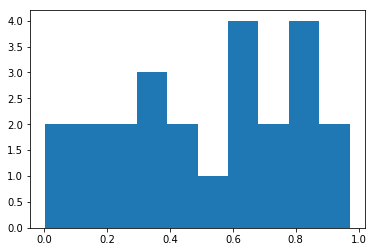

In [6]:
from matplotlib import pyplot as plt

plt.hist(uniform.flatten())


This histogram shows that the possible values are between 0 and 1. Every value should be equally likely, but it doesn’t really look that way. The reason for this is that we have only chosen a small number of values. If we increase the size of the array, it becomes much more uniform.

(array([24089., 23822., 23975., 23939., 23937., 24133., 23951., 24179.,
        24212., 23763.]),
 array([2.02655792e-06, 1.00001431e-01, 2.00000834e-01, 3.00000238e-01,
        3.99999642e-01, 4.99999046e-01, 5.99998450e-01, 6.99997854e-01,
        7.99997258e-01, 8.99996662e-01, 9.99996066e-01]),
 <a list of 10 Patch objects>)

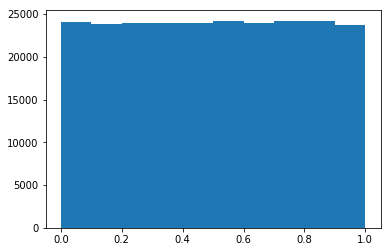

In [7]:
large_normal = tf.random_uniform((600, 400), seed=42)
large_uniform = run_variable(large_normal)

plt.hist(large_uniform.flatten())

That’s more uniform!

A uniform distribution can be quite useful for initialising weights in machine learning models, if you don’t have any other information to go by. It is also a “bounded” distribution, whereby it has a set minimum and maximum value, and the random values cannot fall outside that range. To change the range, for instance to 0 and 10, you multiply by the range and add the minimum. There is an exercise on this at the end of the lesson.

Another commonly used distribution is the normal distribution, implemented in TensorFlow as the random_normal function:

(array([ 16.,  75., 280., 569., 661., 458., 250.,  70.,  17.,   4.]),
 array([-3.10911989, -2.40799129, -1.70686269, -1.00573409, -0.30460548,
         0.39652312,  1.09765172,  1.79878032,  2.49990892,  3.20103753,
         3.90216613]),
 <a list of 10 Patch objects>)

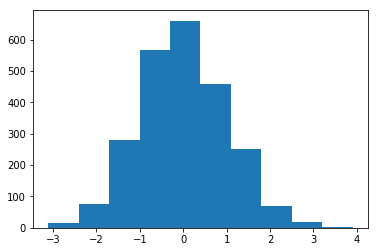

In [8]:
distribution = tf.random_normal((600, 4), seed=42)
normal = run_variable(distribution)
plt.hist(normal.flatten())


This distribution, by default, has a mean of around 0 and a standard deviation of 1. The values are not bounded, but become highly unlikely the further from the mean you stray, with the standard deviation setting the rate of decrease in likelihood. In practice, around 60% of values fall within a “radius” of one standard deviation from the mean in each direction, and 99% fall within 4 standard deviations.

The mean and standard deviation are parameters to the random_normal function. For example, heights can be approximately modeled as a normal distribution with a mean of around 170cm and a standard deviation of around 15cm.

(array([   7.,   90.,  508., 1649., 2866., 2755., 1540.,  483.,   92.,
          10.]), array([112.63173676, 124.2218132 , 135.81188965, 147.40196609,
        158.99204254, 170.58211899, 182.17219543, 193.76227188,
        205.35234833, 216.94242477, 228.53250122]), <a list of 10 Patch objects>)

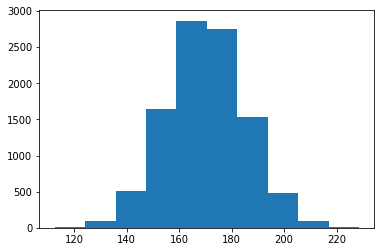

In [9]:
distribution = tf.random_normal((10000,), seed=42, mean=170, stddev=15)
normal = run_variable(distribution)
plt.hist(normal.flatten())

Up to now, our histograms have been generated with matplotlib. We can use TensorFlow to create these as well! The histogram_fixed_width function takes a list of values (like our random values), the range, and the number of bins to compute. It then counts how many values are within the range of each bin, and returns the result as an array.

<Container object of 20 artists>

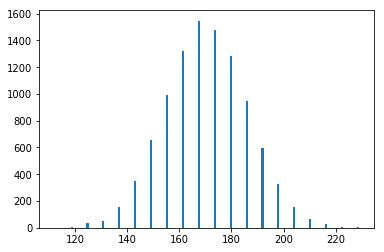

In [10]:
import numpy as np
bins = tf.histogram_fixed_width(normal, (normal.min(), normal.max()), nbins=20)
histogram_bins = run_variable(bins)
x_values = np.linspace(normal.min(), normal.max(), len(histogram_bins))
plt.bar(x_values, histogram_bins,)

In the plt.bar call, we generate the bin values again manually, and then plot those as x values with our histogram_bins as the heights using a bar plot.

That’s correct, but doesn’t look right. The histogram values are there, but the widths are unusually narrow (our bins are represented by single values only). Let’s fix that:

<Container object of 20 artists>

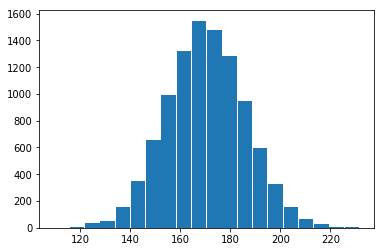

In [11]:
bar_width = (normal.max() - normal.min()) / len(histogram_bins)
plt.bar(x_values, histogram_bins, width=bar_width)